K - Nearest Neighbor(kNN)
----
* Classification task에 주로 사용되는 알고리즘
* 새로운 데이터가 들어오면 가장 가까운 k개의 학습 데이터와 비교
* k개의 데이터 중, 가장 많은 class로 분류됨
* Regression을 위해서 사용될 때는, 인접 학습 데이터의 평균값을 사용
* Hyperparameter k는 상황에 맞춰서 적절히 설정
  * 단순히 다수결로 정하기 보다는, 입력 데이터와 인접 데이터 간의 거리를 이용하여 가중치를 주는 방법도 자주 사용됨
  * 명확한 정답은 없음

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target

In [4]:
# 이항 분류를 위해
X = X[y != 0]
y = y[y != 0]

In [5]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [6]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

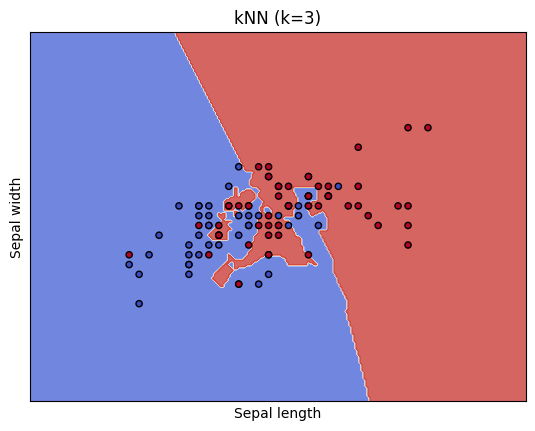

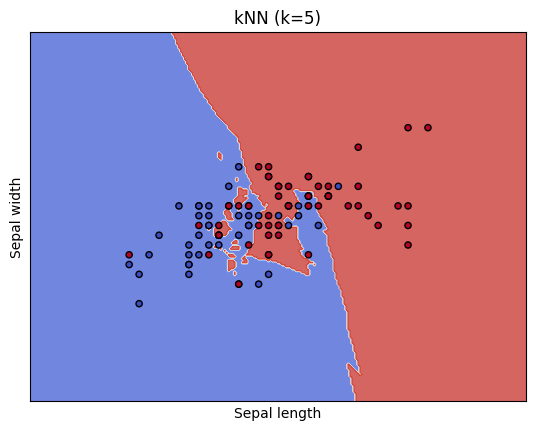

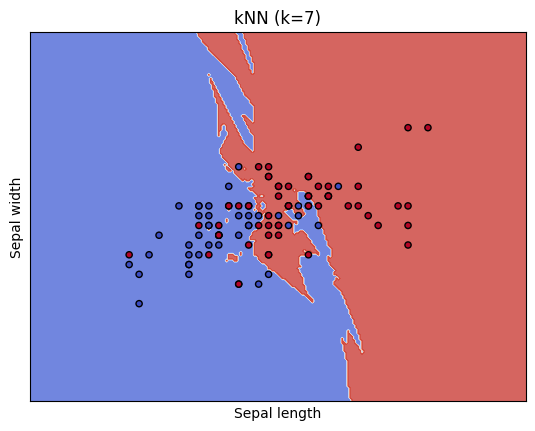

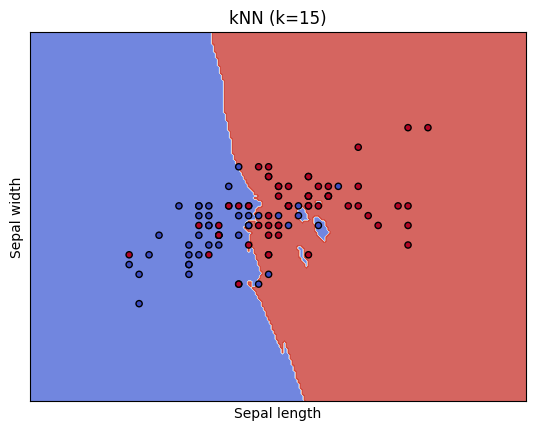

In [7]:
for k in [3, 5, 7, 15]:
  # kNN 모델 학습
  model = KNeighborsClassifier(k)
  model.fit(X, y)

  # Decision boundary를 시각화
  plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

  # 학습 데이터들을 시각화
  plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")
  plt.title(f"kNN (k={k})")
  plt.xticks(())
  plt.yticks(())
  plt.show()